# Подключение необходимых модулей

In [1]:
from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import imutils
import time
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib import cm
import pyperclip
import random

import torch
from torch.autograd import Variable
import torchvision.transforms as transforms

# Загрузим видеофайл и посмотрим на первый кадр

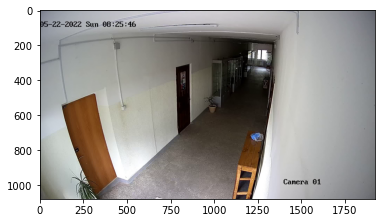

In [2]:
vs = cv2.VideoCapture("./input/test.mkv")

ret, frame = vs.read()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

# В данном блоке указаны символы, которые необходимо распознать в дате

In [3]:
NUMBER = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ALPHABET = [
    'u', 'n', 'o', 'e', 'd', 'h', 'r', 'i',
    '-', ':', ' ',
    'S', 'M', 'T', 'W', 'F'
]
ALL_CHAR_SET = NUMBER + ALPHABET
ALL_CHAR_SET_LEN = len(ALL_CHAR_SET)

# Функция которая возвращает дату в текстовом виде из предсказания

In [4]:
def get_pred(pred):
    c0  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[0:ALL_CHAR_SET_LEN])]
    c1  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN:ALL_CHAR_SET_LEN*2])]
    c2  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*2:ALL_CHAR_SET_LEN*3])]
    c3  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*3:ALL_CHAR_SET_LEN*4])]
    c4  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*4:ALL_CHAR_SET_LEN*5])]
    c5  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*5:ALL_CHAR_SET_LEN*6])]
    c6  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*6:ALL_CHAR_SET_LEN*7])]
    c7  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*7:ALL_CHAR_SET_LEN*8])]
    c8  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*8:ALL_CHAR_SET_LEN*9])]
    c9  = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*9:ALL_CHAR_SET_LEN*10])]
    c10 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*10:ALL_CHAR_SET_LEN*11])]
    c11 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*11:ALL_CHAR_SET_LEN*12])]
    c12 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*12:ALL_CHAR_SET_LEN*13])]
    c13 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*13:ALL_CHAR_SET_LEN*14])]
    c14 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*14:ALL_CHAR_SET_LEN*15])]
    c15 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*15:ALL_CHAR_SET_LEN*16])]
    c16 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*16:ALL_CHAR_SET_LEN*17])]
    c17 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*17:ALL_CHAR_SET_LEN*18])]
    c18 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*18:ALL_CHAR_SET_LEN*19])]
    c19 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*19:ALL_CHAR_SET_LEN*20])]
    c20 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*20:ALL_CHAR_SET_LEN*21])]
    c21 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*21:ALL_CHAR_SET_LEN*22])]
    c22 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*22:ALL_CHAR_SET_LEN*23])]
  
    c = '%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s%s' % (
        c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,
        c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, 
    )
    return(c)

# Пример отметки времени (ее и будем распознавать 1 раз в секунду на видео)

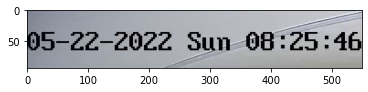

In [5]:
cropped_image = frame[30:125, 0:550]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

# Изменение размеров блока отметки времени

In [6]:
transform = transforms.Compose([
    transforms.Resize([128, 512]),
    transforms.ToTensor(),
])

# Загрузим модель и попробуем распознать время

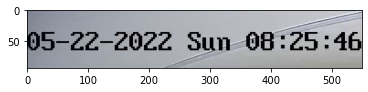

05-22-2022 Sun 08:25:46


In [7]:
## загрузка модели
if torch.cuda.is_available():
    model = torch.load('test_model.pth')  
    device = torch.device('cuda')
else:
    model = torch.load('test_model.pth', map_location = torch.device('cpu'))
    device = torch.device('cpu')
## загрузка модели

PIL_image = Image.fromarray(np.uint8(cropped_image)).convert('RGB')
PIL_image = PIL_image.convert('L')
    
img = transform(PIL_image)

if torch.cuda.is_available():
    img = Variable(img).cuda()
else:
    img = Variable(img).cpu()
    
pred = model(img.unsqueeze(0))

out = get_pred(pred) # получение текста из предсказания


######
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

print(out)
######

# Так будут выглядеть изображения в тесте (обрезаем часть стены справа)

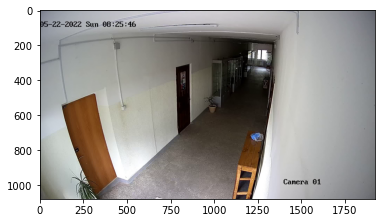

исходное изображение


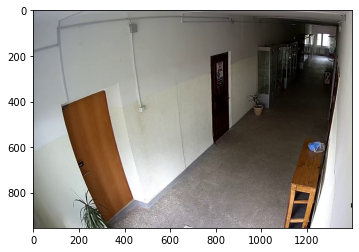

обрезанное изображение


In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()
print('исходное изображение')

cropped_image = frame[125:, 0:1400]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()
print('обрезанное изображение')

# Служебный блок (пересоздаем каталог, конвертируем дату время в соотвестствии с форматом даты-времени в видеофайле)

In [9]:
dtest = pd.read_csv('./input/test.csv')
dtest.head()

,id,date
0,135,2022-05-22 11:51:06
1,136,2022-05-22 11:51:25
2,137,2022-05-22 12:04:27
3,138,2022-05-22 12:07:56
4,139,2022-05-22 12:08:10


In [10]:
# удалить и создать каталог
import shutil
import os

path = './test_image/'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)
    
def convert_date(x):
    out = ''
    x2 = x.split(' ')
    x0 = x2[0]
    x0 = x0.split('-')
    out = x0[1] + '-' + x0[2]+'-'+ x0[0] + ' ' + x2[1]
    return out

dtest['datex'] = dtest['date'].apply(lambda x: convert_date(x))
dtest['image'] = ''
dtest.head()

,id,date,datex,image
0,135,2022-05-22 11:51:06,05-22-2022 11:51:06,
1,136,2022-05-22 11:51:25,05-22-2022 11:51:25,
2,137,2022-05-22 12:04:27,05-22-2022 12:04:27,
3,138,2022-05-22 12:07:56,05-22-2022 12:07:56,
4,139,2022-05-22 12:08:10,05-22-2022 12:08:10,


# Загружаем модель и начинаем перебор видеофайла с интервалом в 1 сек.
# Каждую секунду распознаем дату-время, и если дата-время есть в файле test.csv, сохраняем снимок экрана в папку "./test_image/".
# Так же сохраняем файл "01-test_image.csv", в котором содержится соотвествующее имя файла изображения.

In [11]:
second = 0
end = True

while end:
    
    try:
        ##### получаем изображение из видео файла с периодом 1 сек.
        key = second * 1000    
        vs.set(cv2.CAP_PROP_POS_MSEC, key)
        ret, frame = vs.read()
        ##### получаем изображение из видео файла с периодом 1 сек.
        
        ##### вырезаем из изображения часть с отметкой времени
        img = frame[30:125, 0:550]
        ##### вырезаем из изображения часть с отметкой времени
        
        ##### получаем из изображения отметку времени в текствовм виде
        PIL_image = Image.fromarray(np.uint8(img)).convert('RGB')
        PIL_image = PIL_image.convert('L')
    
        imgs = transform(PIL_image)
        imgs = Variable(imgs).cuda()
        pred = model(imgs.unsqueeze(0))
        c = get_pred(pred)
        ##### получаем из изображения отметку времени в текствовм виде
        
        ##### удаляем не используемые отметки дня недели
        c = c.replace(' Sun ', ' ')
        c = c.replace(' Mon ', ' ')
        c = c.replace(' Tue ', ' ')
        ##### удаляем не используемые отметки дня недели
    
        if c in dtest['datex'].unique(): # проевряем что дата-время из изображения есть в файле 
            
            ret, frame = vs.read()
            frame = frame[125:, 0:1400] # обрезаем часть стены справа            
            print(c)
            
            #формирую имя файла изображения вида "05-22-2022_11_51_06.png"
            img_name = c.replace(':',"_").replace(' ',"_")        
            img_name = "{}.png".format(img_name)
            
            # записываю имя файл в таблицу и сохраняю файл изображения
            idx = dtest[dtest['datex'] == c].index
            dtest.loc[idx, 'image'] = img_name
            cv2.imwrite(path + img_name, frame)
            # записываю имя файл в таблицу и сохраняю файл изображения
            
            # сохраняю файл каждые 25 секунд
            if second % 25 == 0:
                dtest.to_csv('test_image.csv', index  = False)    
        second += 1
        
    except:
        end = False
    
dtest.to_csv('test_image.csv', index  = False)

05-22-2022 11:51:06
05-22-2022 11:51:25
05-22-2022 12:04:27
05-22-2022 12:07:56
05-22-2022 12:08:10
05-22-2022 12:08:57
05-22-2022 12:09:23
05-22-2022 12:11:28
05-22-2022 12:11:40
05-22-2022 12:11:45
05-22-2022 12:12:31
05-22-2022 12:44:40
05-22-2022 12:44:45
05-22-2022 12:46:33
05-22-2022 12:46:38
05-22-2022 12:46:40
05-22-2022 12:46:41
05-22-2022 12:46:47
05-22-2022 12:46:50
05-22-2022 12:46:53
05-22-2022 12:47:03
05-22-2022 12:47:26
05-22-2022 12:47:40
05-22-2022 12:47:42
05-22-2022 12:50:41
05-22-2022 12:50:58
05-22-2022 12:52:40
05-22-2022 12:52:42
05-22-2022 12:54:28
05-22-2022 12:54:30
05-22-2022 12:54:46
05-22-2022 12:54:59
05-22-2022 13:00:31
05-22-2022 13:00:32
05-22-2022 13:00:41
05-22-2022 13:01:21
05-22-2022 13:01:23
05-22-2022 13:01:45
05-22-2022 13:01:51
05-22-2022 13:02:21
05-22-2022 13:02:24
05-22-2022 13:04:23
05-22-2022 13:04:25
05-22-2022 13:04:27
05-22-2022 13:04:28
05-22-2022 13:04:29
05-22-2022 13:10:13
05-22-2022 13:10:20
05-22-2022 13:13:16
05-22-2022 13:13:22


05-23-2022 09:31:34
05-23-2022 09:41:42
05-23-2022 09:42:51
05-23-2022 09:43:33
05-23-2022 09:44:39
05-23-2022 09:45:47
05-23-2022 09:45:48
05-23-2022 09:47:19
05-23-2022 09:49:12
05-23-2022 09:51:41
05-23-2022 09:59:30
05-23-2022 09:59:32
05-23-2022 09:59:35
05-23-2022 10:18:39
05-23-2022 10:18:54
05-23-2022 10:18:56
05-23-2022 10:18:57
05-23-2022 10:20:06
05-23-2022 10:20:08
05-23-2022 10:20:10
05-23-2022 10:51:40
05-23-2022 10:52:21
05-23-2022 10:52:29
05-23-2022 10:53:31
05-23-2022 10:53:38
05-23-2022 10:53:48
05-23-2022 10:54:43
05-23-2022 10:57:24
05-23-2022 10:57:32
05-23-2022 10:57:41
05-23-2022 11:11:35
05-23-2022 11:11:40
05-23-2022 11:11:41
05-23-2022 11:11:42
05-23-2022 11:14:01
05-23-2022 11:14:15
05-23-2022 11:14:17
05-23-2022 11:14:19
05-23-2022 11:14:32
05-23-2022 11:14:34
05-23-2022 11:15:31
05-23-2022 11:15:46
05-23-2022 11:17:13
05-23-2022 11:17:21
05-23-2022 11:17:23
05-23-2022 11:17:27
05-23-2022 11:17:29
05-23-2022 11:17:30
05-23-2022 11:17:31
05-23-2022 11:17:38


05-23-2022 16:49:34
05-23-2022 16:50:32
05-23-2022 16:50:45
05-23-2022 16:51:26
05-23-2022 16:51:40
05-23-2022 16:52:18
05-23-2022 16:52:31
05-23-2022 16:53:34
05-23-2022 16:53:48
05-23-2022 16:54:32
05-23-2022 16:54:45
05-23-2022 16:55:26
05-23-2022 16:55:39
05-23-2022 16:56:19
05-23-2022 16:56:32
05-23-2022 16:57:12
05-23-2022 16:57:26
05-23-2022 16:58:04
05-23-2022 16:58:17
05-23-2022 16:58:58
05-23-2022 16:59:11
05-23-2022 16:59:54
05-23-2022 17:00:03
05-23-2022 17:01:16
05-23-2022 17:01:24
05-23-2022 17:02:04
05-23-2022 17:02:19
05-23-2022 17:02:56
05-23-2022 17:03:10
05-23-2022 17:03:50
05-23-2022 17:04:05
05-23-2022 17:04:51
05-23-2022 17:05:05
05-23-2022 17:05:47
05-23-2022 17:06:01
05-23-2022 17:06:37
05-23-2022 17:06:52
05-23-2022 17:07:30
05-23-2022 17:07:45
05-23-2022 17:08:22
05-23-2022 17:08:36
05-23-2022 17:09:18
05-23-2022 17:09:33
05-23-2022 17:10:10
05-23-2022 17:10:24
05-23-2022 17:14:31
05-23-2022 17:14:44
05-23-2022 17:15:18
05-23-2022 17:15:33
05-23-2022 17:17:56


In [12]:
dtest.head()

,id,date,datex,image
0,135,2022-05-22 11:51:06,05-22-2022 11:51:06,05-22-2022_11_51_06.png
1,136,2022-05-22 11:51:25,05-22-2022 11:51:25,05-22-2022_11_51_25.png
2,137,2022-05-22 12:04:27,05-22-2022 12:04:27,05-22-2022_12_04_27.png
3,138,2022-05-22 12:07:56,05-22-2022 12:07:56,05-22-2022_12_07_56.png
4,139,2022-05-22 12:08:10,05-22-2022 12:08:10,05-22-2022_12_08_10.png


https://lk.hacks-ai.ru/758261/champ